# Odhad pravděpodobnosti rubu u mince

Označme:
- $n \in \mathbb{N}_0$ počet hodů mincí
- $X=k \in \{0,\ldots, n\}$ počet rubů
- $\pi \in [0, 1]$ pravděpodobnost tohoto jevu

Výsledky hodů mincí budeme popisovat binomickým modelem,
$$
X=k|\pi, n \sim \text{binom}(n,\pi) \qquad\text{s pravděpodobností} \qquad
f(X=k|\pi, n) = \binom{n}{k}\pi^k (1-\pi)^{n-k}.
$$

Apriorní distribuci pro odhad $\pi$ zvolíme beta distribuci,
$$
\pi \sim \beta(a_0, b_0) \qquad \text{s hustotou psti} \qquad
p(\pi|a_0, b_0) = \frac{1}{B(a_0, b_0)} \pi^{a_0-1} (1-\pi)^{b_0-1}. 
$$

### Úkol 1 (teorie)
Odvoďte pomocí Bayesovy věty aposteriorní distribuci, potažmo aposteriorní hyperparametry. Připomeňme, že vzorec je
$$
\begin{aligned}
p(\pi|a_1, b_1) 
&\propto p(\pi|a_0, b_0, n, X=k) \\
&\propto f(X=k|\pi, n) p(\pi|a_0, b_0),
\end{aligned}
$$
a že můžeme ignorovat normalizační konstanty.

### Úkol 2 (kód)
Je dáno $n, a_0, b_0$ a data $x$. Naprogramujte bayesovský update apriorna (tj. hyperparametrů $a_0, b_0$ na $a_1, b_1$).

In [2]:
import numpy as np
from scipy.stats import beta, binom
np.random.seed(123)
pi = 0.4                             # Tuto veličinu budeme odhadovat, uvidíme, jak dobře

n = 10                               ### počet hodů
a0 = 1                               ### apriorní hyperparametr beta rozdělení
b0 = 1                               ### apriorní hyperparametr beta rozdělení

x = binom.rvs(n=n, p=pi)
print('Počet hodů: {0}, počet rubů: X={1}'.format(n, x))
print('Apriorní rozdělení: beta({0:.1f}, {1:.1f})'.format(a0, b0))

#---------------------------------------------
# Zde bude váš výpočet aposteriorna
# Výsledkem budou hyperparametry a1, b1
#---------------------------------------------

print('Aposteriorní rozdělení: beta({0:.1f}, {1:.1f})'.format(a1, b1))

Počet hodů: 10, počet rubů: X=5
Apriorní rozdělení: beta(1.0, 1.0)
Aposteriorní rozdělení: beta(6.0, 6.0)


## Odhad $\pi$
Z přednášky víme, že $\beta(a, b)$ má střední hodnotu a rozptyl
$$
\mathbb{E}[\pi] = \mathbb{E}[\pi|a,b] = \frac{a}{a+b},
\qquad\text{a}\qquad
\text{var}\pi = \frac{a b}{(a + b)^2(a+b+1)}.
$$

### Úkol 3 (kód)
Naprogramujte bodový odhad $\pi$ jako střední hodnotu aposteriorního beta rozdělení a související varianci tohoto odhadu.

In [3]:
#---------------------------------------------
# Zde bude váš výpočet střední hodnoty a variance
# Výsledkem budou proměnné e_pi a var_pi
#---------------------------------------------

print('Aposteriorní odhad: E[pi] = {0:.2f}, jeho variance je var(pi) = {1:.2f}'.format(e_pi, var_pi))

Aposteriorní odhad: E[pi] = 0.50, jeho variance je var(pi) = 0.02


### Úkol 4 (kód)

V grafu níže najdete graf hustoty apriorní distribuce. Přidejte graf hustoty aposteriorní distribuce.

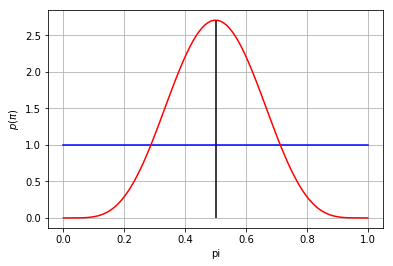

In [7]:
import matplotlib.pylab as plt

x_vals = np.linspace(start=1e-5, stop=1, num=100)    # body na ose x
y_vals_prior = beta.pdf(x_vals, a=a0, b=b0)          # hodnoty beta hustoty pro body na ose x
plt.plot(x_vals, y_vals_prior, color='blue')
plt.xlabel('pi')

#---------------------------------------------
# Zde bude váš kód
# - doplnte popisek osy y (plt.ylabel)
# - vlozte vertikalni caru ve stredni hodnote e_pi od 0 do krivky hustoty (plt.vlines)
#---------------------------------------------

plt.show()

### Úkol 5 (kód)
Zkuste si za domácí úkol vykreslit stejný obrázek (byl v přednášce) zobrazující sekvenční zpracování dat z několika experimentů. Můžete výhodně využít numpy array (np.array), jeho některé vlastnosti viz níže:
![Update beta distribuce](../prednasky/img/l1-beta-mince.jpg)

In [27]:
# Demonstrace np.array
x = np.array([1, 2, 3])
print('Vektor: {0}'.format(x))

y = np.array([[1, 2], [3, 4]])
print('Matice:\n {0}'.format(y))
print('Součet řádků: {0}'.format(y.sum(axis=1)))
print('Součet sloupců: {0}'.format(y.sum(axis=0)))

# Pár metod třídy np.array - jdou i pro řádky/sloupce vícerozměrných polí np.array
# Pro nápovědu zkuste shift-tab za otvírací závorkou
print('Součet: {0}'.format(x.sum()))
print('Průmer: {0}'.format(x.mean()))
print('Maximum: {0}'.format(x.max()))

# Nebo celá nápověda (odkomentujte)
#?np.linalg.det

Vektor: [1 2 3]
Matice:
 [[1 2]
 [3 4]]
Součet řádků: [3 7]
Součet sloupců: [4 6]
Součet: 6
Průmer: 2.0
Maximum: 3
